In [4]:
import numpy
import tensorflow
import matplotlib
from tensorflow.keras.datasets import mnist

In [3]:
#Load the dataset
(X_train, Y_train), (X_test, Y_test)= mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
#Pre-Processing the Data
print("First, we're going to normalize our pixel sizes")
print("For instance, pixels are from 0 to 255, so we're going to change it from 0 to 1, by dividing 255")
X_train=X_train/255
X_test=X_test/255
#remember, that these X_train and X_test are images, the Y_train and Y_test are the labels (the correct answers)
print("Now, we must flatten the images; these images are 2D images, so we must flatten them into a 1D vector for our model to analyze properly")
X_train=X_train.reshape(-1,28*28)
X_test=X_test.reshape(-1,28*28)
#reshape changes the shape of an array
#the -1 means 1 dimension less than before
#each image has a shape of 28x28 (28 pixels by 28 pixels)


First, we're going to normalize our pixel sizes
For instance, pixels are from 0 to 255, so we're going to change it from 0 to 1, by dividing 255
Now, we must flatten the images; these images are 2D images, so we must flatten them into a 1D vector for our model to analyze properly


In [6]:
#Neural Network Creation
from tensorflow.keras.models import Sequential
#Sequential allows you to create a linear stack of neural network layers
#Essentially, numerous input and output layers
from tensorflow.keras.layers import Dense
#Dense Layer is a type of neural network, where each neuron is connected to EVERY neuron in the previous layer
#So, sequential is a model type (framework for a neural network)
#Dense, is the methodology of connecting them


model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)), #Creates a connected layer with 128 neurons
    Dense(64, activation='relu'),  # Another hidden layer with 64 neurons
    #reLu is an activation function that introduces non-linearity into models, allowing it to read different patterns
    #input shape is the shape of the pictures, which are now 28x28
    Dense(10, activation='softmax')
      #Softmax typically used for output layer, takes previous layer and
      #converts numbers into probabilities
      # 10 output units for 10 classes (digits 0-9)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.compile specifices three components
#1. Optimizer, how the model updates its weights based on the loss (strategy after looking at failures - learning)
#2. Loss, measures the error, helping guide ( in a way like residuals )
#3. Metrics, how to evaluate the model
#optimizer adam specifies optimization algorithm to use
#Adam in particular adapts weight updates with specificity thinking about how first neurons impact later neurons
#sparse cross entropy calc negative logarithm of probability - penalizing model more heavily when it assigns low prob to correct class
#accuracy is percentage of correct predictions


In [9]:
model.fit(X_train, Y_train, epochs=7, validation_split=0.2)
#Epoch is the amount of iterations
#Ex. each time you go through a learning cycle
#validation split is used during training -
#think about it like a student practicing before a test with quizzes

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8691 - loss: 0.4549 - val_accuracy: 0.9610 - val_loss: 0.1312
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9662 - loss: 0.1106 - val_accuracy: 0.9653 - val_loss: 0.1165
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9780 - loss: 0.0730 - val_accuracy: 0.9689 - val_loss: 0.0996
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9823 - loss: 0.0561 - val_accuracy: 0.9756 - val_loss: 0.0891
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9874 - loss: 0.0397 - val_accuracy: 0.9735 - val_loss: 0.0927
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9889 - loss: 0.0336 - val_accuracy: 0.9731 - val_loss: 0.0955
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9742 - val_loss: 0.1012


In [15]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc}')
'''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''
#for this, the outputs are loss and accuracy


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1225
Test accuracy: 0.9732999801635742


"\nmodel.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n"

In [16]:
predictions = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


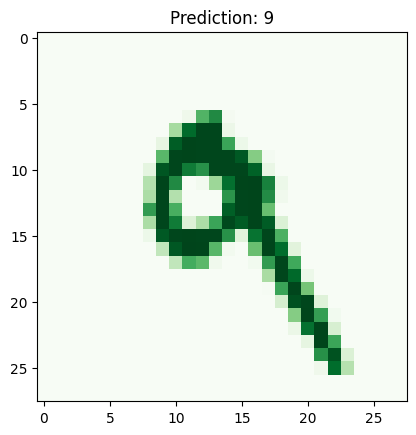

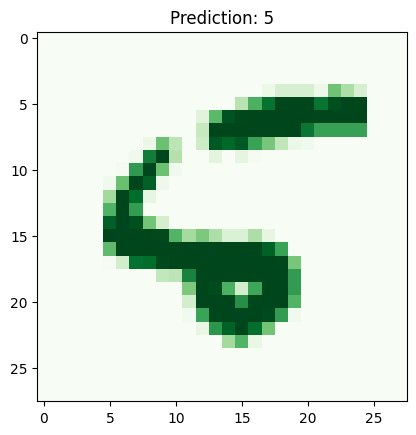

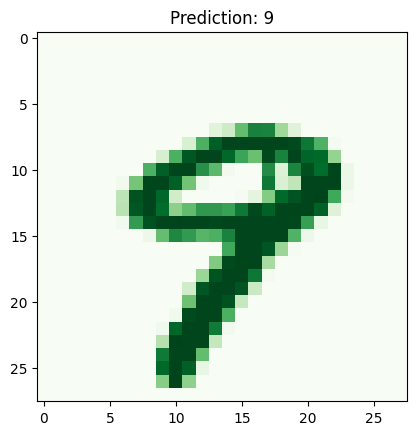

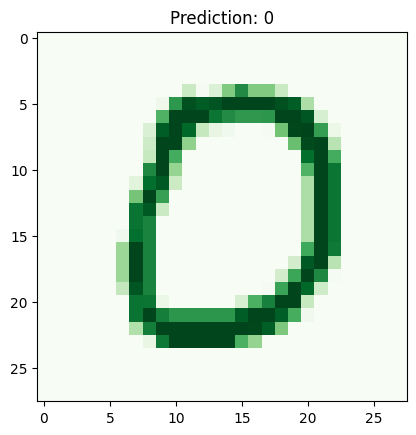

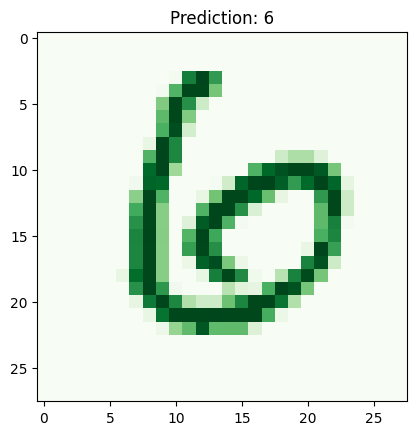

In [27]:
import matplotlib.pyplot as plt #plotter for matplot lib

# Plot the first 5 test images and their predicted labels
for i in range(5):

    plt.imshow(X_test[i+7].reshape(28, 28), cmap='Greens')
    #plt.imshow takes an image array and renders the array as a pixel
    #X_test[i] is iterating through the thing and taking the ith image
    #reshape(28, 28) turns it back into the 2d array of pixels
    #cmap = color
    plt.title(f'Prediction: {predictions[i+7].argmax()}')
    #plt.title is titling the images
    #f strings allow you to embed expressions
    #for instance, this expression of predictions[i].argmax
    #prediction[i].argmax() works by accessing element i and finding the probability
    #by probability it means which probability for the number is highest
    plt.show()
    #plt.show plots it


In [29]:
incorrect_indices = []
for i in range(len(X_test)):
  predicted_class = predictions[i].argmax()
  true_class = Y_test[i]
  if predicted_class != true_class:
    incorrect_indices.append(i)

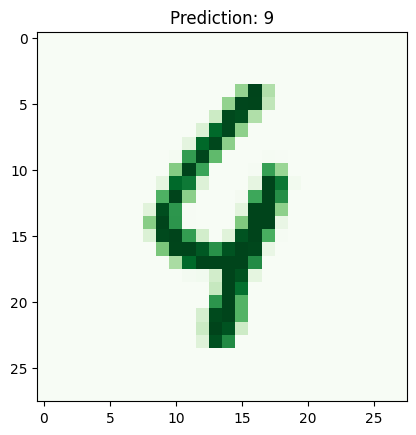

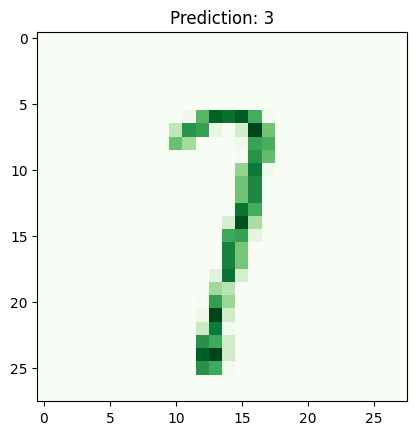

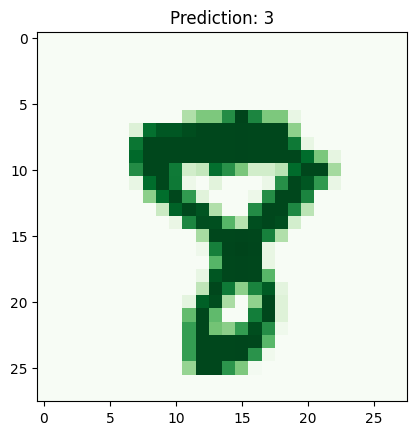

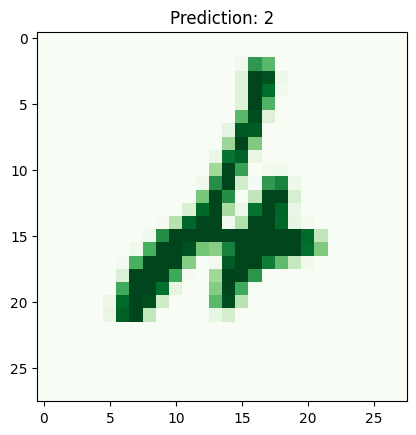

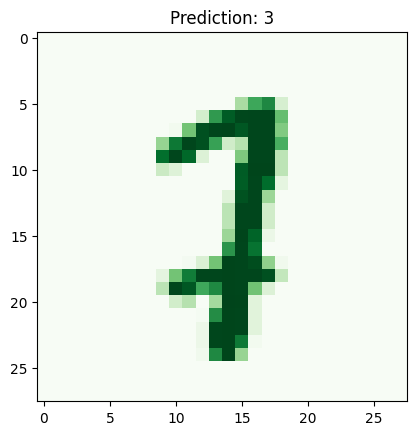

In [31]:
for i in range(5):
    image_index=incorrect_indices[i]
    plt.imshow(X_test[image_index].reshape(28, 28), cmap='Greens')
    #plt.imshow takes an image array and renders the array as a pixel
    #X_test[i] is iterating through the thing and taking the ith image
    #reshape(28, 28) turns it back into the 2d array of pixels
    #cmap = color
    plt.title(f'Prediction: {predictions[image_index].argmax()}')
    #plt.title is titling the images
    #f strings allow you to embed expressions
    #for instance, this expression of predictions[i].argmax
    #prediction[i].argmax() works by accessing element i and finding the probability
    #by probability it means which probability for the number is highest
    plt.show()
    #plt.show plots it